# Activity 2 - PCA using expanded iris dataset

In this activity we are going to use the complete Iris dataset and look at the effect of selecting a differing number of components in the PCA decomposition.  Henceforth we will be using the Sctikit-learn PCA model.

Import pandas, matplotlib and PCA from scikit-learn.  You will also need to include:

```from mpl_toolkits.mplot3d import Axes3D```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

Read in the dataset and select the columns Sepal Length, Sepal Width and Petal Width.

In [2]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width', 'Petal Width']]
df.head()

,Sepal Length,Sepal Width,Petal Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


Plot the data in three dimensions

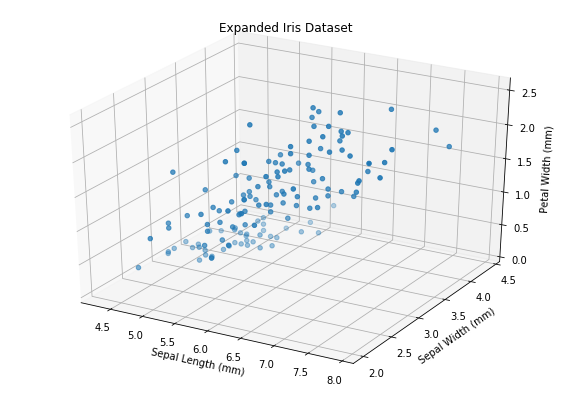

In [3]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Sepal Length'], df['Sepal Width'], df['Petal Width']);
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

Create a PCA model without specifying the number of components

In [4]:
model = PCA()

Fit the model to the dataset

In [5]:
model.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Display the eigenvalues or **explained_variance_ratio_**.

In [6]:
model.explained_variance_ratio_

array([0.8004668 , 0.14652357, 0.05300962])

We want to reduce the dimensionality of the dataset but still keep at least 90% of the variance.  **What is the minimum number of components required to keep 90% of the variance?**

Create a new PCA model, this time specifying the number of components required to keep at least 90% of the variance

In [7]:
model = PCA(n_components=2)

Transform the data using the new model

In [8]:
data_transformed = model.fit_transform(df.values)

Plot the transformed data

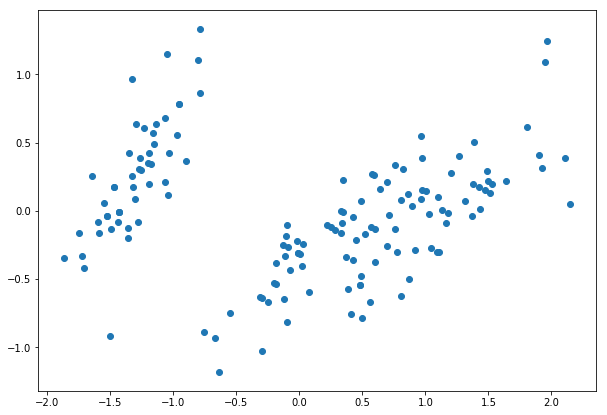

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(data_transformed[:,0], data_transformed[:,1]);

Restore the transformed data to the original dataspace

In [10]:
data_restored = model.inverse_transform(data_transformed)

Plot the restored data in three dimensions in one subplot and the original data in a second subplot to visualise the effect of removing some of the variance.

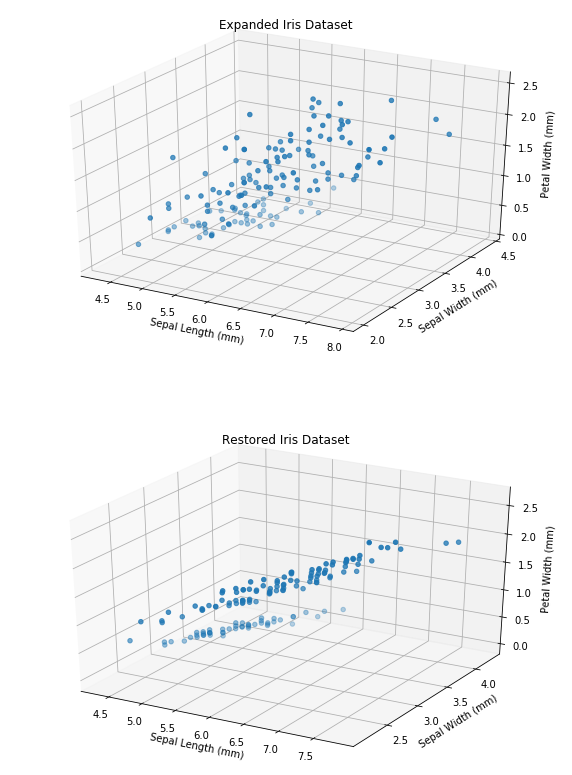

In [11]:
fig = plt.figure(figsize=(10, 14))

# Original Data
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['Sepal Length'], df['Sepal Width'], df['Petal Width'], label='Original Data');
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

# Transformed Data
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], data_restored[:,2], label='Restored Data');
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Restored Iris Dataset');